# 1. Introduction
The scope of the notebook is to prepocess the dataset and perform data exploration

# 2. Load Data

In [1]:
# Import libraries
import os
import pandas as pd

# Get the train.csv path
main_dir = os.path.dirname(os.getcwd())
file_path = main_dir + '\\data\\raw\\train.csv'

# Load train.csv
train_dataset = pd.read_csv(file_path)

# 3. Descriptive Statistics

In [2]:
# List all the available columns
train_columns = train_dataset.columns.to_list()

# Include a description for the columns based on Kaggle
train_columns_description = ['Passenger Id', 
                             'Survival', 
                             'Ticket class', 
                             'Name',
                             'Sex', 
                             'Age in years', 
                             '# of siblings/spouses', 
                             '# of parents/children', 
                             'Ticket number', 
                             'Passenger fare',
                             'Cabin number',
                             'Port of Embarkation']

# Map descriptions to columns
train_columns = dict(zip(train_columns, train_columns_description))
train_columns

{'PassengerId': 'Passenger Id',
 'Survived': 'Survival',
 'Pclass': 'Ticket class',
 'Name': 'Name',
 'Sex': 'Sex',
 'Age': 'Age in years',
 'SibSp': '# of siblings/spouses',
 'Parch': '# of parents/children',
 'Ticket': 'Ticket number',
 'Fare': 'Passenger fare',
 'Cabin': 'Cabin number',
 'Embarked': 'Port of Embarkation'}

## 3.1. train_dataset Samples

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.2 Describe train_dataset

### 3.2.1. Data Types, Missing Values and Cardinality

In [4]:
# Extract the data type of the columns
train_dataset_dtype = train_dataset.dtypes

# Calculate the number of null values for each column
train_dataset_nulls = train_dataset.isnull().sum()
# Calculate nulls %
train_dataset_nulls_p = round(train_dataset_nulls / len(train_dataset) * 100, 1)

# Calculate the unique values (cardinality) of the features
train_dataset_cardinality = train_dataset.nunique()
train_dataset_cardinality_p = round(train_dataset.nunique() / len(train_dataset) * 100, 1)

# Build the DataFrame
train_dataset_info = pd.DataFrame({'Data Type': train_dataset_dtype,
                                   'Nulls': train_dataset_nulls,
                                   'Nulls %': train_dataset_nulls_p,
                                   'Cardinality': train_dataset_cardinality,
                                   'Cardinality %': train_dataset_cardinality_p}
                                 ).reset_index().rename(columns = {'index': "Feature"})
train_dataset_info

,Feature,Data Type,Nulls,Nulls %,Cardinality,Cardinality %
0,PassengerId,int64,0,0.0,891,100.0
1,Survived,int64,0,0.0,2,0.2
2,Pclass,int64,0,0.0,3,0.3
3,Name,object,0,0.0,891,100.0
4,Sex,object,0,0.0,2,0.2
5,Age,float64,177,19.9,88,9.9
6,SibSp,int64,0,0.0,7,0.8
7,Parch,int64,0,0.0,7,0.8
8,Ticket,object,0,0.0,681,76.4
9,Fare,float64,0,0.0,248,27.8


### 3.2.2. Statistics metrics

In [5]:
# Describe the train_dataset
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Function to extract numerical columns and calculate the skew
def col_skew(df):
    df_numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns
    df_numeric_cols_skew = df[df_numeric_cols].skew()
    return df_numeric_cols_skew

# Extract numerical columns and calculate the skew for the unprocessed train dataset
col_skew(train_dataset)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [7]:
# Extract categorical columns
train_cat_cols = train_dataset.select_dtypes(include = 'object')

# 4. Handling Missing Values (manually)

## 4.1. Numerical columns

In [8]:
train_dataset_processed = train_dataset.copy()

# Extract numerical columns and calculate the skew
col_skew(train_dataset_processed)

# Function to replace missing values for numerical columns
def num_fill_nan(df):
    # Extract the columns that contain missing values
    df_numeric = df.select_dtypes(include = ['int64', 'float64'])
    df_nan_col = df_numeric.columns[df_numeric.isnull().any()].tolist()
    # Iterate through all the columns with missing values and fill them with mean if skew value <= 0.5 and with the median if skew value > 0.5
    for col in df_nan_col:
        skew_val = col_skew(df)[col]
        if skew_val <= 0.5:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())
    return df 
train_dataset_processed = num_fill_nan(train_dataset_processed)

# Create the "Age_was_nan" boolean column to identify what were the nan values which was filled in using the num_fill_nan function
train_dataset_processed["Age_was_nan"] = train_dataset["Age"].isnull().astype(int)

## 4.2. Categorical columns

In [9]:
# # Function to replace missing values for categorical columns with "Missing"
def cat_fill_nan(df):
    df_categorical = df.select_dtypes(include = ['object'])
    df_nan_col = df_categorical.columns[df_categorical.isnull().any()].tolist()
    for col in df_nan_col:
        df[col] = df[col].fillna("Missing")
    return df

cat_fill_nan(train_dataset_processed)

# Create "Cabin_Letter" column to extract the first letter of the Cabin
train_dataset_processed['Cabin'] = train_dataset_processed['Cabin'].str[0]

# 4. Distribution and Visualization

In [10]:
# Function to create a histogram before/after for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
def num_col_hist(col_before, col_after):    
    plt.figure(figsize = (12, 4))
    
    # Distribution before
    plt.subplot(1, 2, 1)
    sns.histplot(col_before, kde = 'True', color = 'red')
    plt.title(f'{col_before.name} with NaN')

    # Distribution after
    plt.subplot(1, 2, 2)
    sns.histplot(col_after, kde = 'True', color = 'green')
    plt.title(f'{col_after.name} without NaN')

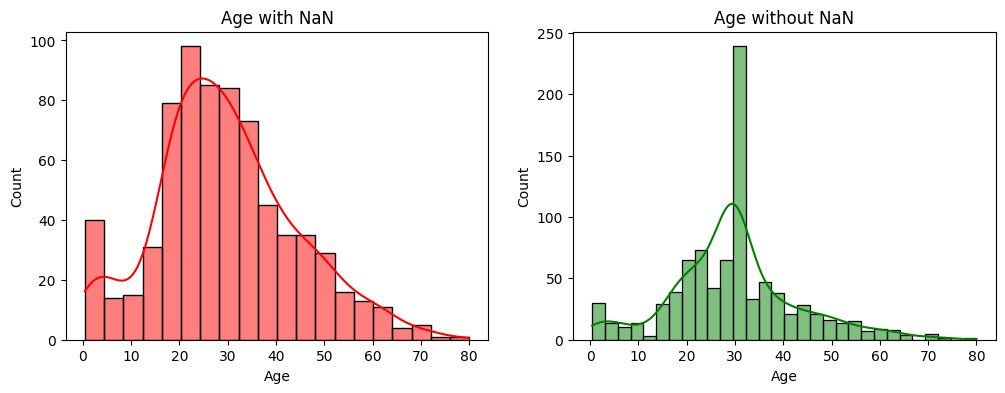

In [11]:
# Plot the "Age" column before and after filling the missing values
num_col_hist(train_dataset['Age'], train_dataset_processed['Age'])

In [12]:
# # Function to create a countplot before/after for categorical columns
def cat_col_plot(col_before, col_after, top_n = 15):
    plt.figure(figsize = (14, 4))

    # Distribution before
    top_values_before = col_before.value_counts().nlargest(top_n)
    col_grouped_before = col_before.apply(lambda x: x if x in top_values_before else "Other")

    plt.subplot(1, 2, 1)
    sns.countplot(x = col_grouped_before, order = list(top_values_before.index) + ['Other'], color = 'red')
    plt.title(f'{col_before.name} with NaN')

    # Distribution after
    top_values_after = col_after.value_counts().nlargest(top_n)
    col_grouped_after = col_after.apply(lambda x: x if x in top_values_after else "Other")

    plt.subplot(1, 2, 2)
    sns.countplot(x = col_grouped_after, order = list(top_values_after.index) + ['Other'], color = 'green')
    plt.title(f'{col_after.name} without NaN')

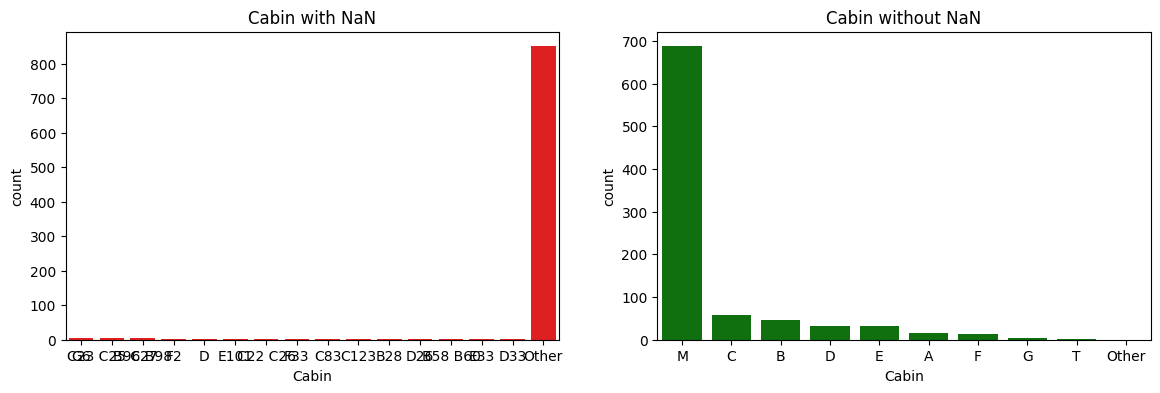

In [13]:
# Plot the "Cabin" before and after filling the missing values
cat_col_plot(train_dataset['Cabin'], train_dataset_processed['Cabin'])

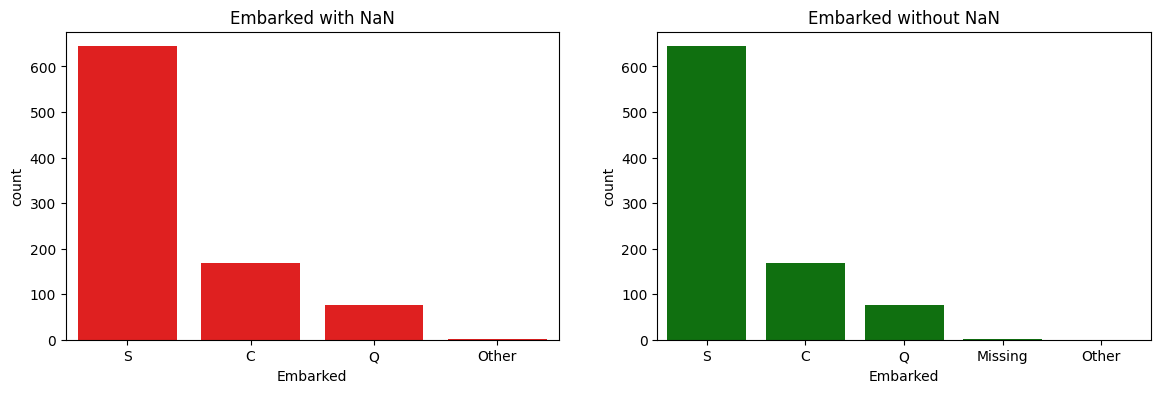

In [14]:
# Plot the "Embarked" before and after filling the missing values
cat_col_plot(train_dataset['Embarked'], train_dataset_processed['Embarked'])

# 5. Correlation and Relationship

## 5.1. Heatmaps
Build Heatmaps to get the Pearson correlation matrix for numerical columns

<Axes: >

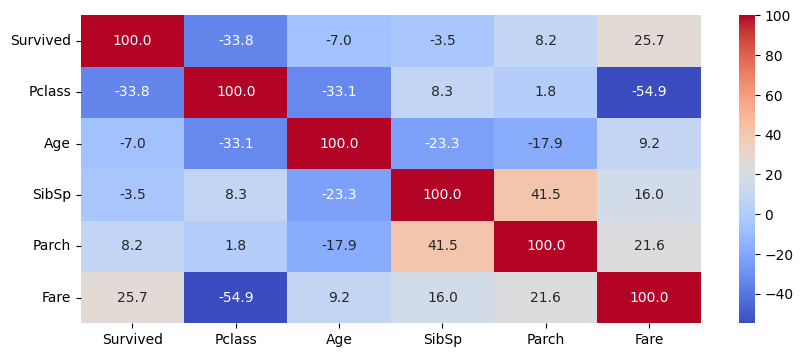

In [15]:
# Extract the numerical columns after processing the train dataset
train_dataset_processed_num_cols = train_dataset.select_dtypes(include = ['int64', 'float64']).columns

# Exclude PassengerID since it contains unique values and it's irrelevant
train_dataset_processed_num_cols = train_dataset_processed_num_cols.drop('PassengerId')

# Plot the columns using heatmap
plt.figure(figsize = (10, 4))
train_num_cols_corr = train_dataset_processed[train_dataset_processed_num_cols].corr() * 100
sns.heatmap(train_num_cols_corr, annot = True, cmap = 'coolwarm', fmt = '.1f')

In [16]:
# Function to automatically drop redundant features
def drop_redundant_features(df, df_num_cols, target_col = 'Survived', ff_threshold = 0.8, ft_threshold = 0.1):
    # Calculate features vs feature correlation
    train_corr_cols = df_num_cols.drop(target_col)
    train_ff_corr = df[train_corr_cols].corr().abs()
    print('Feature vs feature Pearson correlation matrix:')
    display(train_ff_corr)
    
    # Calculate features vs target correlation
    train_ft_corr = df[train_corr_cols].corrwith(df["Survived"]).abs().to_frame(name = 'Survived')
    print('Feature vs target Pearson correlation matrix:')
    display(train_ft_corr.sort_values(by = target_col, ascending = False))
    
    # Drop redundant columns based on Pearson Correlation
    train_num_features_cols = set(train_corr_cols)
    train_num_features_cols_discarded = set() 
    # Calculate the feature vs feature corr to remove colinearity (feature vs feature corr >= ff_threshold)
    for i in range(len(train_corr_cols)):
        for j in range(i + 1, len(train_corr_cols)): # i + 1 will exclude the duplicated correlations and the diagonal correlation (Age vs Age)
            f_i = train_corr_cols[i]
            f_j = train_corr_cols[j]
            if train_ff_corr.loc[f_i, f_j] >= ff_threshold:
                if train_ft_corr.loc[f_i, 'Survived'] >= train_ft_corr.loc[f_j, 'Survived']:
                    train_num_features_cols.discard(f_j)
                    train_num_features_cols_discarded.add(f_j)
                else:
                    train_num_features_cols.discard(f_i)
                    train_num_features_cols_discarded.add(f_i)
    
    # Remove redundant features vs target (feature vs target corr < ft_threshold)
    for f in list(train_num_features_cols):
        if train_ft_corr.loc[f, 'Survived'] < ft_threshold:
            train_num_features_cols.discard(f)
            train_num_features_cols_discarded.add(f)
            
    # Print discarded columns and the correlation with the target
    print(f'\n❌ Discarded features: {sorted(train_num_features_cols_discarded)}')
    for f in list(train_num_features_cols_discarded):
        print(f'- Weak correlation of feature {f} with the target: {train_ft_corr.loc[f, target_col]:.2f}')

    # Print kept columns and the correlation with the target
    print(f'\n✅ Kept features to be included in the model: {sorted(train_num_features_cols)}')
    for f in train_num_features_cols:
        print (f'- Feature "{f}" corelation with the target: {train_ft_corr.loc[f, target_col]:.2f}') 
    return train_num_features_cols

drop_redundant_features(train_dataset_processed, train_dataset_processed_num_cols)

Feature vs feature Pearson correlation matrix:


,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,0.331339,0.083081,0.018443,0.549500
Age,0.331339,1.000000,0.232625,0.179191,0.091566
SibSp,0.083081,0.232625,1.000000,0.414838,0.159651
Parch,0.018443,0.179191,0.414838,1.000000,0.216225
Fare,0.549500,0.091566,0.159651,0.216225,1.000000


Feature vs target Pearson correlation matrix:


,Survived
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.069809
SibSp,0.035322



❌ Discarded features: ['Age', 'Parch', 'SibSp']
- Weak correlation of feature Parch with the target: 0.08
- Weak correlation of feature Age with the target: 0.07
- Weak correlation of feature SibSp with the target: 0.04

✅ Kept features to be included in the model: ['Fare', 'Pclass']
- Feature "Pclass" corelation with the target: 0.34
- Feature "Fare" corelation with the target: 0.26


{'Fare', 'Pclass'}

# 7. Feature Transformation

# 8. Next Steps